 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
from utils import crps_normal

Using TensorFlow backend.


In [2]:
mean = 1
sigma = 3
obs = 2

In [3]:
crps_normal(mean, sigma, obs)

0.83284793515116295

In [4]:
from scipy.stats import norm

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np

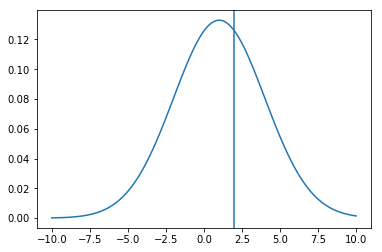

In [7]:
x = np.linspace(-10, 10, 100)
plt.plot(x, norm.pdf(x, mean, sigma))
plt.axvline(obs)

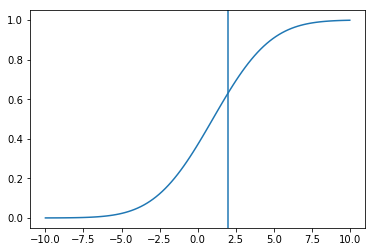

In [8]:
plt.plot(x, norm.cdf(x, mean, sigma))
plt.axvline(obs)

In [9]:
bins = np.arange(-10, 11)
bins

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [10]:
from scipy.stats import binned_statistic

In [11]:
discrete_pdf = binned_statistic(x, norm.pdf(x, mean, sigma), bins=bins)[0]
discrete_pdf

array([ 0.00027361,  0.00084067,  0.00230843,  0.00566494,  0.01242418,
        0.02435222,  0.04265903,  0.06678636,  0.0934483 ,  0.11685937,
        0.13060667,  0.13046003,  0.11646618,  0.09292485,  0.0662632 ,
        0.04222987,  0.02405312,  0.01224403,  0.00557026,  0.00226476])

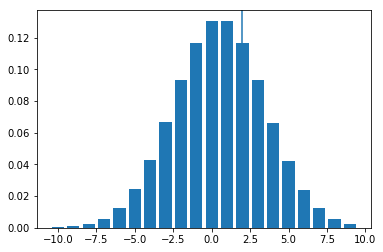

In [12]:
plt.bar(bins[:-1], discrete_pdf)
plt.axvline(obs)

In [13]:
discrete_cdf = binned_statistic(x, norm.cdf(x, mean, sigma), bins=bins)[0]
discrete_cdf

array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
         6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
         6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
         3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
         6.93614298e-01,   7.99910861e-01,   8.80299806e-01,
         9.34691631e-01,   9.67616736e-01,   9.85447581e-01,
         9.94086548e-01,   9.97831012e-01])

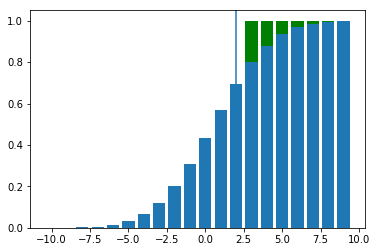

In [14]:
plt.bar(bins[:-1], discrete_cdf)
plt.bar(bins[:-1], np.asarray(bins[:-1] > obs, dtype='float'), color='g', zorder=0.1)
plt.axvline(obs)
plt.savefig('./test_plot')

In [15]:
np.cumsum(discrete_pdf), discrete_cdf

(array([  2.73605201e-04,   1.11428006e-03,   3.42270989e-03,
          9.08764703e-03,   2.15118273e-02,   4.58640472e-02,
          8.85230742e-02,   1.55309436e-01,   2.48757734e-01,
          3.65617100e-01,   4.96223769e-01,   6.26683795e-01,
          7.43149975e-01,   8.36074828e-01,   9.02338032e-01,
          9.44567898e-01,   9.68621016e-01,   9.80865051e-01,
          9.86435315e-01,   9.88700070e-01]),
 array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
          6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
          6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
          3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
          6.93614298e-01,   7.99910861e-01,   8.80299806e-01,
          9.34691631e-01,   9.67616736e-01,   9.85447581e-01,
          9.94086548e-01,   9.97831012e-01]))

In [16]:
discrete_cdf - np.asarray(bins[:-1] > obs, dtype='float')

array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
         6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
         6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
         3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
         6.93614298e-01,  -2.00089139e-01,  -1.19700194e-01,
        -6.53083690e-02,  -3.23832638e-02,  -1.45524189e-02,
        -5.91345226e-03,  -2.16898819e-03])

In [17]:
np.mean((discrete_cdf - np.asarray(bins[:-1] > obs, dtype='float'))**2)

0.060450646164963498